In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
# Load USDT/COP historical data from Yahoo Finance
usdt_cop = yf.download('USDCOP=X', start='2015-01-01', end='2023-09-25', progress=False)

In [39]:
# Create a new DataFrame
data = pd.DataFrame()
data['Close'] = usdt_cop['Close']
data['Next Close'] = data['Close'].shift(-1)

In [40]:
# Clean data
data.dropna(inplace=True)

In [41]:
# Create features (X) and target (y)
X = data[['Close']]
y = data['Next Close']

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

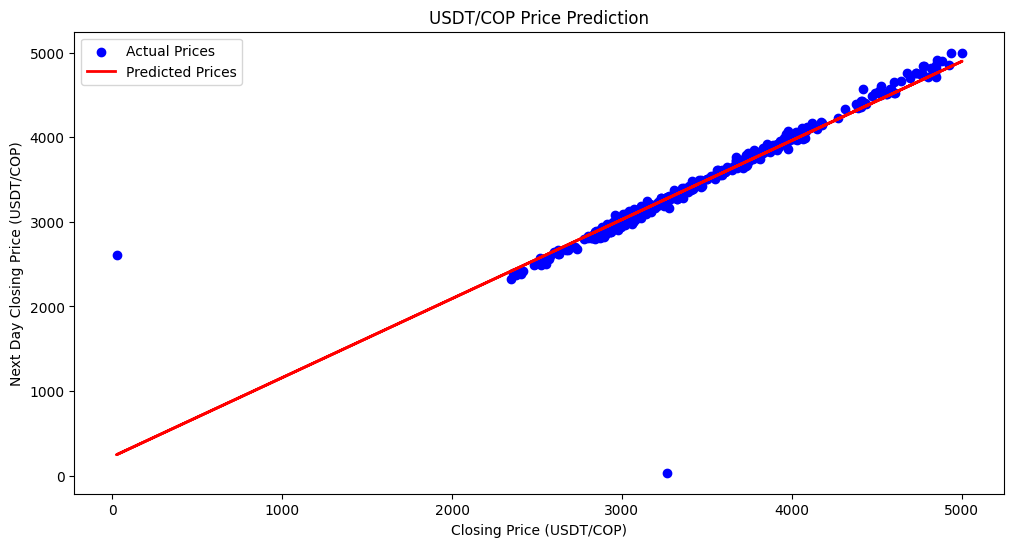

In [44]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('USDT/COP Price Prediction')
plt.xlabel('Closing Price (USDT/COP)')
plt.ylabel('Next Day Closing Price (USDT/COP)')
plt.legend()
plt.show()